In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from figure import plots
import pingouin as pg

In [2]:
def assign_vals(table, cols, new_col):
    for i, c in enumerate(cols):
        new_c = new_col[i]
        table[new_c] = 0
        for tid in table.index:
            data = pd.read_csv('./Dataset/Data/%s.tsv'%tid, sep='\t', index_col=0)
            table.loc[tid, new_c] = data[c].max()

    return table

# SVM

In [3]:
random_bias     = pd.read_csv('./Score_wodirection_trtssplit/SVM/mean.tsv', sep='\t', index_col=0)
random_balance  = pd.read_csv('./Score_unbiased_trtssplit/SVM/mean.tsv', sep='\t', index_col=0)
bothout_bias    = pd.read_csv('./Score_axv/SVM/mean_bothout.tsv', sep='\t', index_col=0)
bothout_balance = pd.read_csv('./Score_unbiased_axv/SVM/mean_bothout.tsv', sep='\t', index_col=0)

random_bias     = random_bias.loc[random_balance.index,:]
bothout_bias    = bothout_bias.loc[bothout_balance.index, :]

random_bias     = assign_vals(random_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
random_balance  = assign_vals(random_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_bias    = assign_vals(bothout_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_balance = assign_vals(bothout_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])

random_bias['model']     = 'random'
random_balance['model']  = 'random'
bothout_bias['model']    = 'bothout'
bothout_balance['model'] = 'bothout'

random_bias['balance']     = 'biased'
random_balance['balance']  = 'balanced'
bothout_bias['balance']    = 'biased'
bothout_balance['balance'] = 'balanced'


all_score = pd.concat([random_bias, random_balance, bothout_bias, bothout_balance])
all_score['subject'] = all_score.index.tolist()


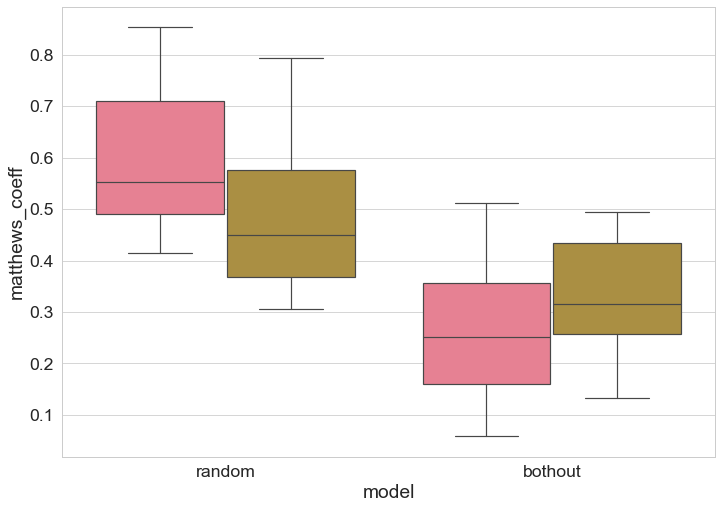

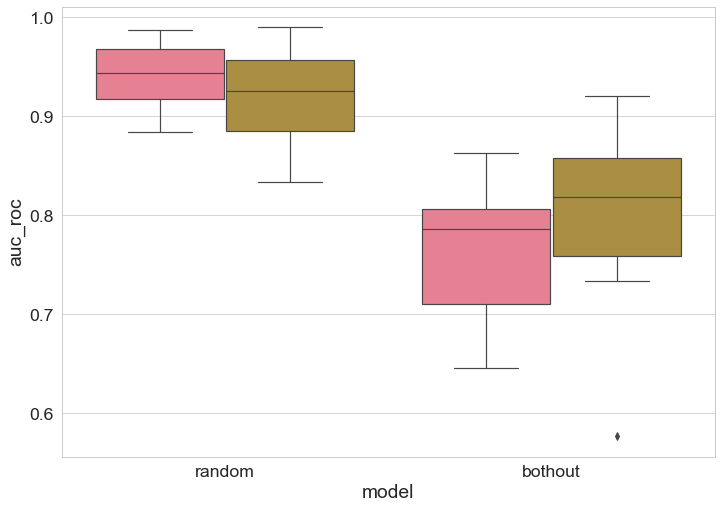

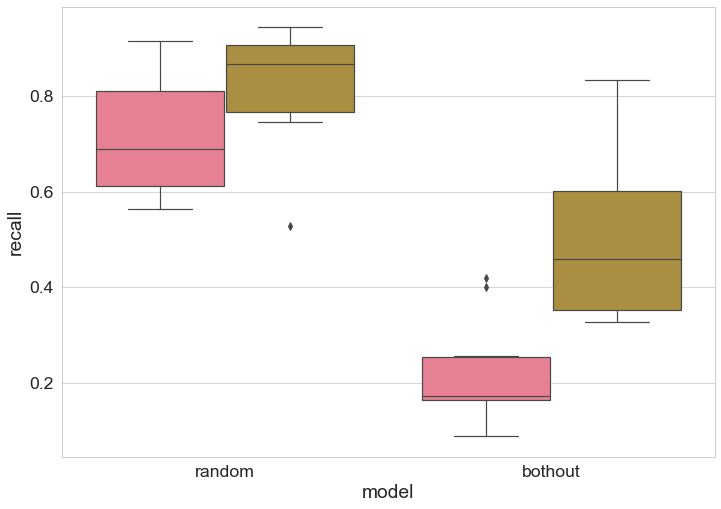

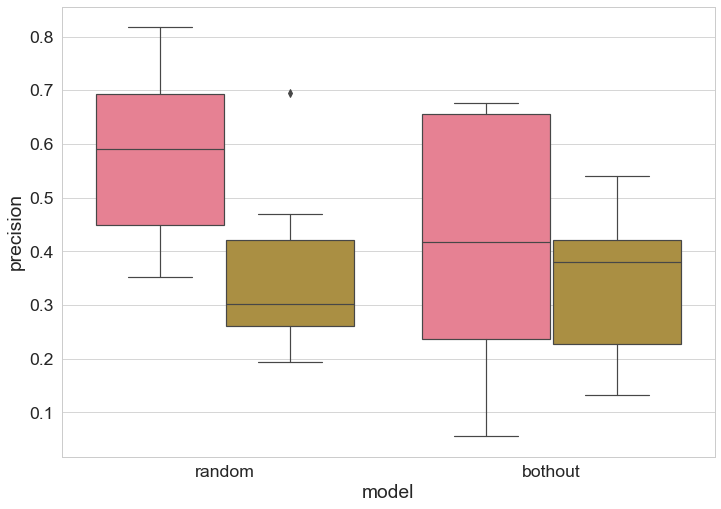

In [4]:
for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            hue       = 'balance',
                            use_swarm = False,
                            show_legend=False,
                            )

In [5]:
val_name = 'matthews_coeff'
pg.ttest(svm_b[val_name].values, svm_ub[val_name].values, paired=True)

AttributeError: 'NotebookFormatter' object has no attribute 'get_result'

               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  4.580627    9   two-sided  0.001327  [0.06, 0.17]  0.787494  32.297   

          power  
T-test  0.60283  

# MPNN

In [19]:
random_bias     = pd.read_csv('./Score_wodirection_trtssplit/MPNN_separated/mean.tsv', sep='\t', index_col=0)
random_balance  = pd.read_csv('./Score_unbiased_trtssplit/MPNN_separated/mean.tsv', sep='\t', index_col=0)
bothout_bias    = pd.read_csv('./Score_axv/MPNN_separated/mean_bothout.tsv', sep='\t', index_col=0)
bothout_balance = pd.read_csv('./Score_unbiased_axv/MPNN_separated/mean_bothout.tsv', sep='\t', index_col=0)

random_bias     = random_bias.loc[random_balance.index,:]
bothout_bias    = bothout_bias.loc[bothout_balance.index, :]

random_bias     = assign_vals(random_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
random_balance  = assign_vals(random_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_bias    = assign_vals(bothout_bias, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
bothout_balance = assign_vals(bothout_balance, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])

random_bias['model']     = 'random'
random_balance['model']  = 'random'
bothout_bias['model']    = 'bothout'
bothout_balance['model'] = 'bothout'

random_bias['balance']     = 'biased'
random_balance['balance']  = 'balanced'
bothout_bias['balance']    = 'biased'
bothout_balance['balance'] = 'balanced'


all_score = pd.concat([random_bias, random_balance, bothout_bias, bothout_balance])
all_score['subject'] = all_score.index.tolist()


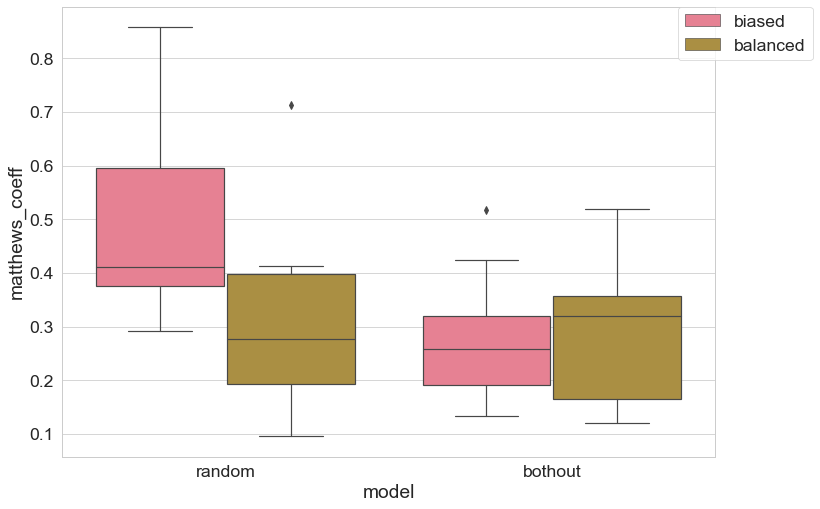

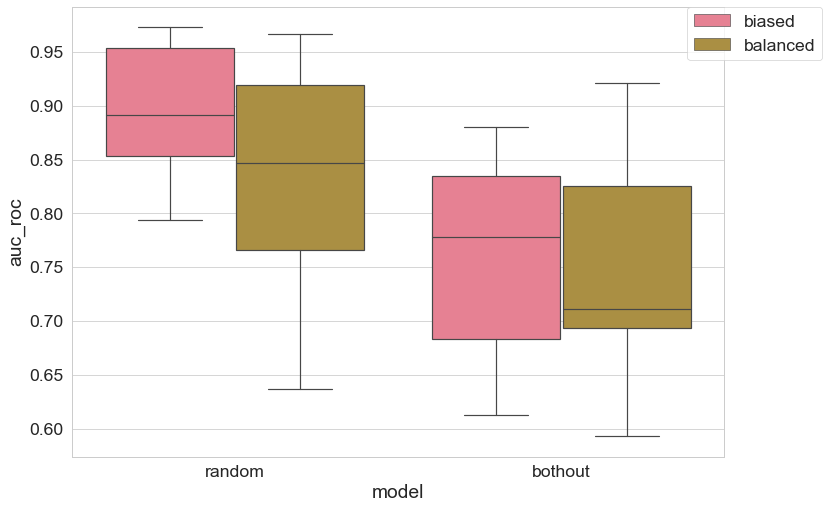

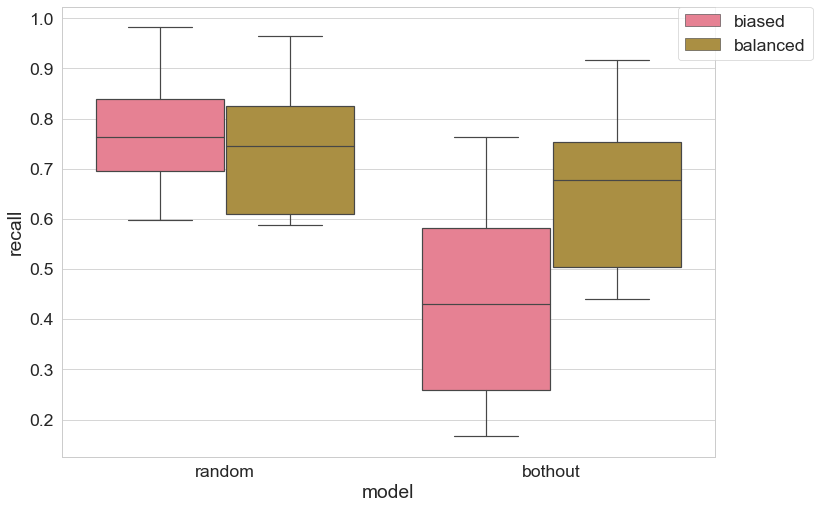

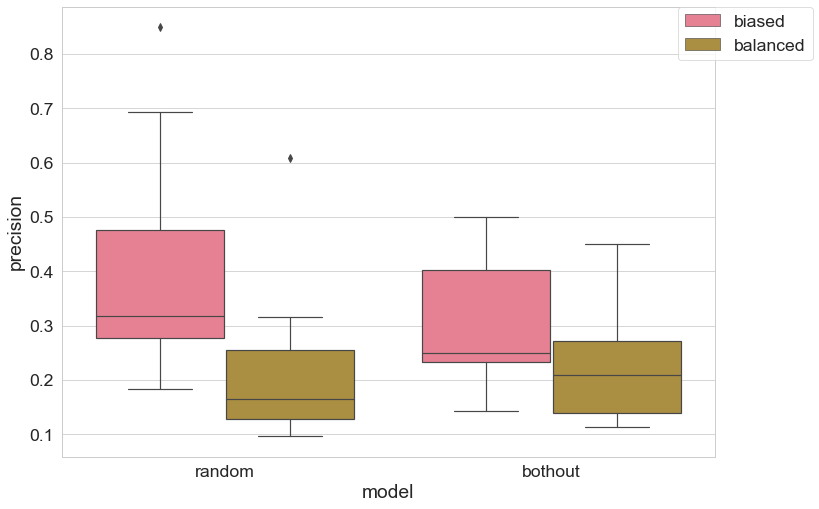

In [20]:
os.makedirs('./Score_unbiased_axv/swarm_performance_%s/' %(split), exist_ok=True)

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            hue       = 'balance',
                            use_swarm = False,
                            )
    plt.savefig('./Score_unbiased_axv/swarm_performance_%s/swarm_%s.png' %(split, metric))

In [9]:
val_name = 'precision'
pg.ttest(mpn_sep_b[val_name].values, mpn_sep_ub[val_name].values, paired=True)

AttributeError: 'NotebookFormatter' object has no attribute 'get_result'

               T  dof alternative     p-val         CI95%   cohen-d  BF10  \
T-test  2.802511    9   two-sided  0.020628  [0.01, 0.12]  0.549229  3.49   

           power  
T-test  0.342295  